# LetsGrowMore #DEC2021

Author - Siddhesh D Patil

Task-1: Stock Market Prediction And Forecasting Using Stacked LSTM

Level : Beginner

Language-Python

Software-Colab Notebook

Dataset-: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Data Sorting

In [6]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# visualization

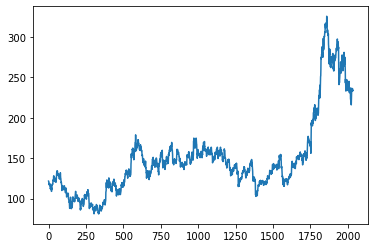

In [9]:
plt.plot(df['Close'])

In [10]:
dff=df['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

# Min Max Scaler

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Spliting the Dataset,convert an array of values into a dataset matrix,Spliting Data into Train and Test

In [12]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

In [13]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating the LSTM Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 6s 148ms/step - loss: 0.0099 - val_loss: 0.0019
Epoch 2/60
19/19 [==============================] - 2s 88ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/60
19/19 [==============================] - 2s 89ms/step - loss: 9.2043e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 2s 101ms/step - loss: 8.7421e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 2s 94ms/step - loss: 8.4122e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 2s 86ms/step - loss: 8.1041e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 2s 86ms/step - loss: 7.9085e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 2s 86ms/step - loss: 8.1871e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 2s 86ms/step - loss: 7.5122e-04 - val_loss: 0.0010
Epoch 10/60
19/19 [==============================] - 2s 87ms/step - loss: 7.188

# Prediction and Checking Performance

In [19]:
test_predict=model.predict(X_test)
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[140.5285  ],
       [140.72954 ],
       [139.89761 ],
       [137.3662  ],
       [135.69562 ],
       [135.08711 ],
       [136.14973 ],
       [137.68932 ],
       [138.19017 ],
       [137.93915 ],
       [137.7279  ],
       [138.80475 ],
       [139.55576 ],
       [141.03416 ],
       [143.12186 ],
       [141.3209  ],
       [138.9621  ],
       [138.42868 ],
       [138.9051  ],
       [143.569   ],
       [147.90834 ],
       [150.21977 ],
       [150.7116  ],
       [148.77783 ],
       [148.38705 ],
       [148.0223  ],
       [148.31538 ],
       [149.8897  ],
       [150.68341 ],
       [150.7911  ],
       [151.20175 ],
       [150.17197 ],
       [147.15083 ],
       [141.7674  ],
       [138.37132 ],
       [137.30719 ],
       [137.45644 ],
       [136.83159 ],
       [134.80167 ],
       [131.3985  ],
       [128.93484 ],
       [127.67385 ],
       [125.641205],
       [124.74964 ],
       [122.792564],
       [120.2585  ],
       [119.41684 ],
       [119.0

# calculating performance

In [20]:
import math
from sklearn.metrics import mean_squared_error
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.05166411518898522